<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Creating_Multi_Output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

In [3]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [4]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()




In [5]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [6]:
URI = '/content/energy.xlsx'


In [7]:
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)


In [8]:
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

In [9]:
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)


In [10]:
norm_train_X = norm(train)
norm_test_X = norm(test)

In [11]:
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

y2_output = Dense(units='1', name='y2_output')(third_dense)



In [12]:
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

In [15]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


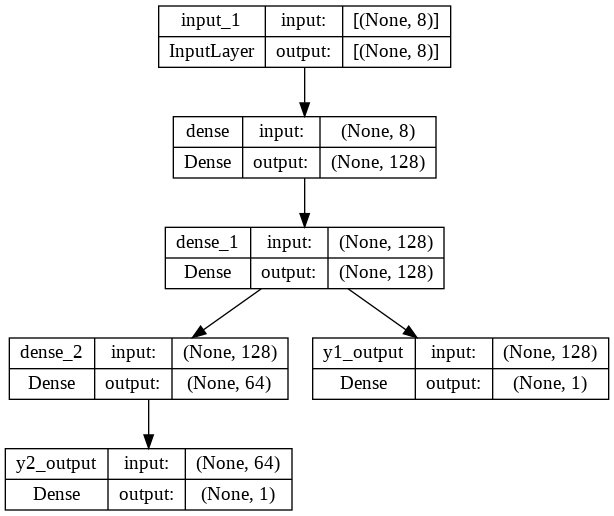

In [21]:
from tensorflow.keras.layers import Layer

model.layer=[ layer for layer in model.layers if isinstance(layer, Layer)]

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,to_file='model.png')

In [22]:
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 2s 11ms/step - loss: 239.1660 - y1_output_loss: 112.6930 - y2_output_loss: 126.4730 - y1_output_root_mean_squared_error: 10.6157 - y2_output_root_mean_squared_error: 11.2460 - val_loss: 27.3136 - val_y1_output_loss: 11.2593 - val_y2_output_loss: 16.0544 - val_y1_output_root_mean_squared_error: 3.3555 - val_y2_output_root_mean_squared_error: 4.0068
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 33.6892 - y1_output_loss: 13.2373 - y2_output_loss: 20.4518 - y1_output_root_mean_squared_error: 3.6383 - y2_output_root_mean_squared_error: 4.5224 - val_loss: 23.9551 - val_y1_output_loss: 9.1256 - val_y2_output_loss: 14.8296 - val_y1_output_root_mean_squared_error: 3.0209 - val_y2_output_root_mean_squared_error: 3.8509
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 27.2123 - y1_output_loss: 10.5781 - y2_output_loss: 16.6342 - y1_output_root_mean_squared_error: 3.2524 - y2_output_root_mean_sq

In [24]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_Mse = {}, Y2_loss = {}, Y2_Mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 1.3480 - y1_output_loss: 0.1661 - y2_output_loss: 1.1819 - y1_output_root_mean_squared_error: 0.4075 - y2_output_root_mean_squared_error: 1.0872
Loss = 1.348024606704712, Y1_loss = 0.1660938709974289, Y1_Mse = 0.40754616260528564, Y2_loss = 1.1819307804107666, Y2_Mse = 1.087166428565979


5/5 [==============================] - 0s 3ms/step


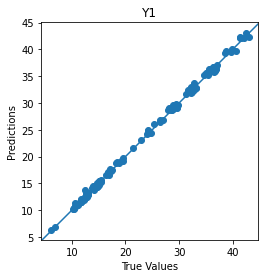

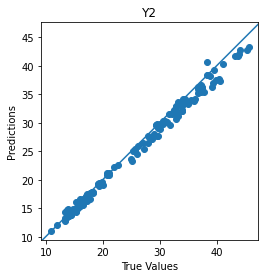

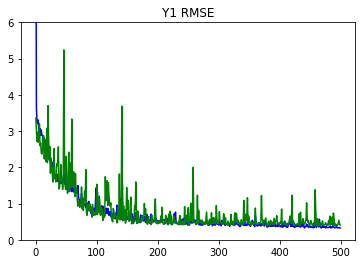

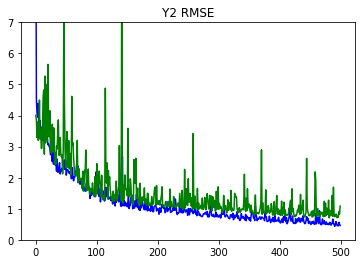

In [25]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)